In [ ]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline 

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/heart failur classification dataset.csv')
df

,Unnamed: 0,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0,75.0,0,582,0,20,1,265000.00,1.9,NaN,Male,No,4.0,1
1,1,55.0,0,7861,0,38,0,263358.03,1.1,136.0,Male,No,6.0,1
2,2,65.0,0,146,0,20,0,162000.00,1.3,129.0,Male,Yes,7.0,1
3,3,50.0,1,111,0,20,0,210000.00,1.9,137.0,Male,No,7.0,1
4,4,65.0,1,160,1,20,0,327000.00,2.7,116.0,Female,No,8.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,294,62.0,0,61,1,38,1,155000.00,1.1,143.0,Male,Yes,270.0,0
295,295,55.0,0,1820,0,38,0,270000.00,1.2,NaN,Female,No,271.0,0
296,296,45.0,0,2060,1,60,0,742000.00,0.8,138.0,Female,No,278.0,0
297,297,45.0,0,2413,0,38,0,140000.00,1.4,140.0,Male,Yes,280.0,0


In [ ]:
df.shape


(299, 14)

In [ ]:
df.isnull().sum()


Unnamed: 0                  0
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                6
sex                         0
smoking                     0
time                        7
DEATH_EVENT                 0
dtype: int64

In [ ]:

df = df.drop(['Unnamed: 0'], axis = 1)
df.shape

(299, 13)

In [ ]:
from sklearn.impute import SimpleImputer

impute = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

impute.fit(df[['time']])

df['time'] = impute.transform(df[['time']])

In [ ]:
df = df.dropna(axis = 0, subset = ['serum_sodium'])

In [ ]:
print (df.isnull().sum())
print (df.shape)

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64
(293, 13)


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 1 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       293 non-null    float64
 1   anaemia                   293 non-null    int64  
 2   creatinine_phosphokinase  293 non-null    int64  
 3   diabetes                  293 non-null    int64  
 4   ejection_fraction         293 non-null    int64  
 5   high_blood_pressure       293 non-null    int64  
 6   platelets                 293 non-null    float64
 7   serum_creatinine          293 non-null    float64
 8   serum_sodium              293 non-null    float64
 9   sex                       293 non-null    object 
 10  smoking                   293 non-null    object 
 11  time                      293 non-null    float64
 12  DEATH_EVENT               293 non-null    int64  
dtypes: float64(5), int64(6), object(2)
memory usage: 32.0+ KB


In [ ]:
df['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
df['smoking'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder 
enc = LabelEncoder()

df['smoking']= enc.fit_transform(df['smoking'])

In [ ]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
1,55.0,0,7861,0,38,0,263358.03,1.1,136.0,Male,0,6.0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129.0,Male,1,7.0,1
3,50.0,1,111,0,20,0,210000.00,1.9,137.0,Male,0,7.0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116.0,Female,0,8.0,1
5,90.0,1,47,0,40,1,204000.00,2.1,132.0,Male,1,8.0,1


In [ ]:
sex_enc = pd.get_dummies(df['sex'])
df['sex']=sex_enc
df.head()



,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
1,55.0,0,7861,0,38,0,263358.03,1.1,136.0,0,0,6.0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129.0,0,1,7.0,1
3,50.0,1,111,0,20,0,210000.00,1.9,137.0,0,0,7.0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116.0,1,0,8.0,1
5,90.0,1,47,0,40,1,204000.00,2.1,132.0,0,1,8.0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 1 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       293 non-null    float64
 1   anaemia                   293 non-null    int64  
 2   creatinine_phosphokinase  293 non-null    int64  
 3   diabetes                  293 non-null    int64  
 4   ejection_fraction         293 non-null    int64  
 5   high_blood_pressure       293 non-null    int64  
 6   platelets                 293 non-null    float64
 7   serum_creatinine          293 non-null    float64
 8   serum_sodium              293 non-null    float64
 9   sex                       293 non-null    uint8  
 10  smoking                   293 non-null    int64  
 11  time                      293 non-null    float64
 12  DEATH_EVENT               293 non-null    int64  
dtypes: float64(5), int64(7), uint8(1)
memory usage: 30.0 KB


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df)
df_scale=scaler.transform(df)
print(df_scale)

[[0.27272727 0.         1.         ... 0.         0.         1.        ]
 [0.45454545 0.         0.01569278 ... 1.         0.00364964 1.        ]
 [0.18181818 1.         0.01122735 ... 0.         0.00364964 1.        ]
 ...
 [0.09090909 0.         0.25988773 ... 0.         0.99270073 0.        ]
 [0.09090909 0.         0.30492473 ... 1.         1.         0.        ]
 [0.18181818 0.         0.02207196 ... 1.         0.66058394 0.        ]]


In [ ]:
print("per-feature minimum before scaling:\n {}".format(df.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(df.max(axis=0)))

per-feature minimum before scaling:
 age                            40.0
anaemia                         0.0
creatinine_phosphokinase       23.0
diabetes                        0.0
ejection_fraction              14.0
high_blood_pressure             0.0
platelets                   25100.0
serum_creatinine                0.5
serum_sodium                  113.0
sex                             0.0
smoking                         0.0
time                            6.0
DEATH_EVENT                     0.0
dtype: float64
per-feature maximum before scaling:
 age                             95.0
anaemia                          1.0
creatinine_phosphokinase      7861.0
diabetes                         1.0
ejection_fraction               80.0
high_blood_pressure              1.0
platelets                   850000.0
serum_creatinine                 9.4
serum_sodium                   148.0
sex                              1.0
smoking                          1.0
time                           280.0

In [ ]:
print("per-feature minimum after scaling:\n {}".format(
    df_scale.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(
    df_scale.max(axis=0)))

per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
y = df.DEATH_EVENT
x= df.drop('DEATH_EVENT',axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
x_train.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
144,72.0,1,943,0,25,1,338000.00,1.70,139.0,0,1,111.0
243,73.0,1,1185,0,40,1,220000.00,0.90,141.0,1,0,213.0
12,45.0,1,981,0,30,0,136000.00,1.10,137.0,0,0,11.0
64,45.0,0,582,0,80,0,263358.03,1.18,137.0,1,0,63.0
262,65.0,1,258,1,25,0,198000.00,1.40,129.0,0,0,235.0


In [ ]:
print("Training set : x->{}, y-> {} \n Testing set: x->{}, y->{}".format(x_train.shape, y_train.shape, x_test.shape, y_test.shape))

Training set : x->(234, 12), y-> (234,) 
 Testing set: x->(59, 12), y->(59,)


# Support Vector Machine

In [ ]:
from sklearn.svm import SVC
svc= SVC(kernel = "linear")
svc.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
print("Training accuracy of the model is {:.2f}".format(svc.score(x_train, y_train)))
print("Testing accuracy of the model is {:.2f}".format(svc.score(x_test, y_test)))

Training accuracy of the model is 0.83
Testing accuracy of the model is 0.85


In [ ]:
predictionsSVC = svc.predict(x_test)
print(predictions)

scoreSVC= accuracy_score(y_test, predictionsSVC)
print (scoreSVC)

[0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
0.847457627118644


In [ ]:
from sklearn.metrics import confusion_matrix
matSVC= confusion_matrix(predictionsSVC, y_test)
print(matSVC)

[[39  8]
 [ 1 11]]


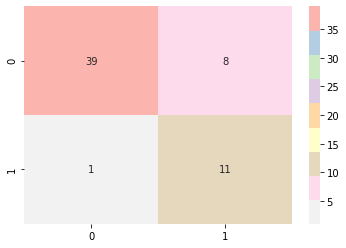

In [ ]:
from seaborn import heatmap
heatmap(matSVC, cmap = "Pastel1_r", xticklabels=['0' ,'1'], yticklabels=['0' ,'1'], annot=True)

# MLP Classifier

In [ ]:
from sklearn.neural_network import MLPClassifier
nnc= MLPClassifier(hidden_layer_sizes=(8), activation = "relu", max_iter=1000000)

In [ ]:
nnc.fit(x_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=8, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
print("The Training accuracy of the model is {:.2f}".format(nnc.score(x_train, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(nnc.score(x_test, y_test)))

The Training accuracy of the model is 0.68
The Testing accuracy of the model is 0.66


In [ ]:
predictionsNNC = nnc.predict(x_test)
print(predictionsNNC)

scoreNNC= accuracy_score(y_test, predictionsNNC)
print (scoreNNC)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0.6610169491525424


In [ ]:
from sklearn.metrics import confusion_matrix
matNNC=confusion_matrix(predictionsNNC, y_test)
print(matNNC)

[[39 19]
 [ 1  0]]


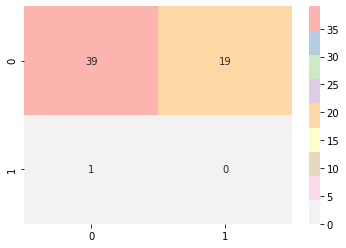

In [ ]:
from seaborn import heatmap
heatmap(matNNC , cmap="Pastel1_r", xticklabels=['0' ,'1'], yticklabels=['0' ,'1'], annot=True)

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 50)
rfc.fit(x_train, y_train)

In [ ]:
print ("The training accuracy of the model is {:.2f}".format(rfc.score(x_train, y_train)))
print ( "The testing accuracy of the model is {:.2f}".format(rfc.score(x_test,y_test)))

In [ ]:
predictionsRFC = rfc.predict(x_test)

scoreRFC= accuracy_score(y_test, predictionsRFC)
print (scoreRFC)

0.864406779661017


In [ ]:
from sklearn.metrics import confusion_matrix 
matRFC= confusion_matrix(predictionsRFC, y_test)
print(matRFC)

In [ ]:
from seaborn import heatmap
heatmap(matRFC , cmap="Pastel1_r", xticklabels=['0' ,'1'], yticklabels=['0' ,'1'], annot=True)

# PCA

In [ ]:
df.shape

(293, 13)

In [ ]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
1,55.0,0,7861,0,38,0,263358.03,1.1,136.0,0,0,6.0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129.0,0,1,7.0,1
3,50.0,1,111,0,20,0,210000.00,1.9,137.0,0,0,7.0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116.0,1,0,8.0,1
5,90.0,1,47,0,40,1,204000.00,2.1,132.0,0,1,8.0,1


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)

In [ ]:
y2 = df.DEATH_EVENT


In [ ]:
dataf=df.drop('DEATH_EVENT',axis=1)
principal_components= pca.fit_transform(dataf)
print(principal_components)

[[ 3.66269321e+02  7.28202264e+03 -1.16301937e+02 -2.10381421e+00
   4.75577249e+00  2.23639693e+00]
 [-1.00993442e+05 -4.10852258e+02 -1.21870311e+02  1.38503126e+01
  -1.02015114e+01  5.57083984e+00]
 [-5.29934508e+04 -4.56309896e+02 -1.22422723e+02  2.29836788e+01
   1.56764530e+00 -2.11141295e+00]
 ...
 [ 4.79006968e+05  1.37628438e+03  1.39622028e+02 -9.16694252e+00
   1.66867883e+01  2.01162289e+00]
 [-1.22992941e+05  1.86065709e+03  1.54677790e+02  5.30237086e+00
   8.48470052e+00 -2.15495738e+00]
 [ 1.32006567e+05 -4.11891109e+02  5.37944833e+01  1.51662407e+00
   1.00231255e+01  1.60162308e+00]]


In [ ]:
principal_df= pd.DataFrame(data=principal_components, columns = ["PC1", "PC2", "PC3", "PC4", "PC5", "PC6"])
principal_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,366.269321,7282.022645,-116.301937,-2.103814,4.755772,2.236397
1,-100993.442100,-410.852258,-121.870311,13.850313,-10.201511,5.570840
2,-52993.450793,-456.309896,-122.422723,22.983679,1.567645,-2.111413
3,64006.556976,-432.861316,-124.433456,15.038811,-12.465922,18.798351
4,-58993.464662,-519.053114,-122.514162,-17.210746,-17.656407,3.682687


In [ ]:
sum(pca.explained_variance_ratio_)

0.9999999997749863

In [ ]:
x2=dataf

In [ ]:
from sklearn.model_selection import train_test_split
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.2)

# SVM

In [ ]:
from sklearn.svm import SVC
svc2 = SVC(kernel = "linear")
svc2.fit(x2_train, y2_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
print("Training accuracy of the model is {:.2f}".format(svc2.score(x2_train, y2_train)))
print("Testing accuracy of the model is {:.2f}".format(svc2.score(x2_test, y2_test)))

Training accuracy of the model is 0.82
Testing accuracy of the model is 0.88


In [ ]:
predictionsSVC2 = svc2.predict(x2_test)
print(predictionsSVC2)
scoreSVC2= accuracy_score(y2_test, predictionsSVC2)
print (scoreSVC2)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
0.8813559322033898


In [ ]:
from sklearn.metrics import confusion_matrix
matSVC2=confusion_matrix(predictionsSVC2, y2_test)
print(matSVC2)

[[46  7]
 [ 0  6]]


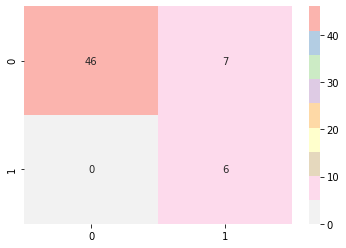

In [ ]:
from seaborn import heatmap
heatmap(matSVC2, cmap = "Pastel1_r", xticklabels=['0' ,'1'], yticklabels=['0' ,'1'], annot=True)

# MLP

In [ ]:
from sklearn.neural_network import MLPClassifier
nnc2= MLPClassifier(hidden_layer_sizes=(8), activation = "relu", max_iter=1000000)

In [ ]:
nnc2.fit(x2_train, y2_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=8, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
print("Training accuracy of the model is {:.2f}".format(nnc2.score(x2_train, y2_train)))
print("Testing accuracy of the model is {:.2f}".format(nnc2.score(x2_test, y2_test)))

Training accuracy of the model is 0.74
Testing accuracy of the model is 0.83


In [ ]:
predictionsNNC2 = nnc2.predict(x2_test)
print(predictionsNNC2)

scoreNNC2= accuracy_score(y2_test, predictionsNNC2)
print (scoreNNC2)

[0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
0.8305084745762712


In [ ]:
from sklearn.metrics import confusion_matrix
matNNC2=confusion_matrix(predictionsNNC2, y2_test)
print(matNNC2)

[[44  8]
 [ 2  5]]


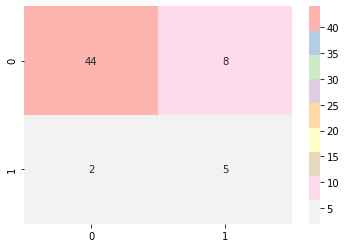

In [ ]:
from seaborn import heatmap
heatmap(matNNC2, cmap = "Pastel1_r", xticklabels=['0' ,'1'], yticklabels=['0' ,'1'], annot=True)

# RFC

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc2 = RandomForestClassifier(n_estimators = 50)
rfc2.fit(x2_train, y2_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
print ("The training accuracy of the model is {:.2f}".format(rfc2.score(x2_train, y2_train)))
print ( "The testing accuracy of the model is {:.2f}".format(rfc2.score(x2_test,y2_test)))

The training accuracy of the model is 1.00
The testing accuracy of the model is 0.86


In [ ]:
predictionsRFC2 = rfc2.predict(x2_test)
scoreRFC2= accuracy_score(y2_test, predictionsRFC2)
print (scoreRFC2)


0.864406779661017


In [ ]:
from sklearn.metrics import confusion_matrix 
matRFC2= confusion_matrix(predictionsRFC2, y2_test)
print(matRFC2)

[[43  5]
 [ 3  8]]


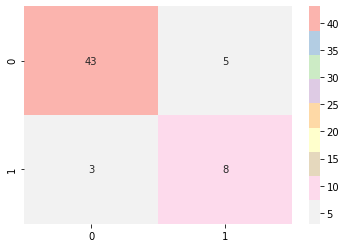

In [ ]:
from seaborn import heatmap
heatmap(matRFC2 , cmap="Pastel1_r", xticklabels=['0' ,'1'], yticklabels=['0' ,'1'], annot=True)

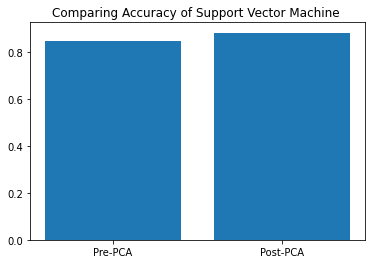

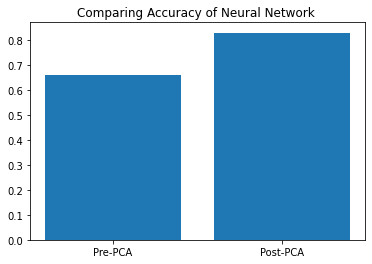

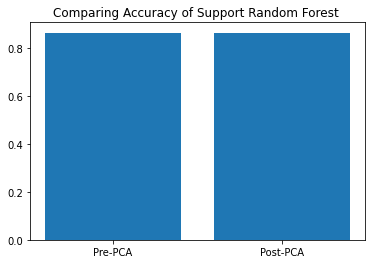

In [ ]:
plt.bar(['Pre-PCA', 'Post-PCA'],[scoreSVC, scoreSVC2])
plt.title('Comparing Accuracy of Support Vector Machine ')
plt.show()

plt.bar(['Pre-PCA', 'Post-PCA'],[scoreNNC, scoreNNC2])
plt.title('Comparing Accuracy of Neural Network ')
plt.show()

plt.bar(['Pre-PCA', 'Post-PCA'],[scoreRFC, scoreRFC2])
plt.title('Comparing Accuracy of Support Random Forest ')
plt.show()

